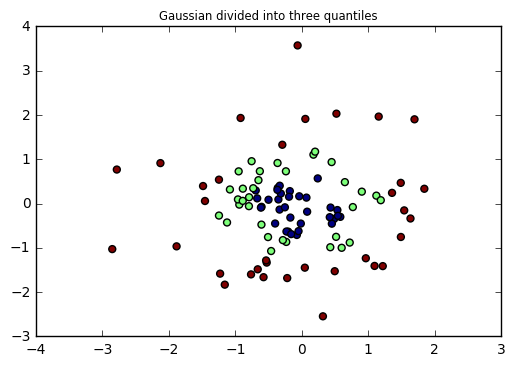

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles



plt.title("Gaussian divided into three quantiles", fontsize='small')
X, Y = make_gaussian_quantiles(n_features=2, n_classes=3)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
            s=25, edgecolor='k')

plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)


clf = MLPClassifier(solver='lbfgs', alpha=0.5, hidden_layer_sizes=(5, 2), random_state=1)
clf = clf.fit(X_train, y_train)
score = clf.score(X_test, y_test) 

print score



0.95


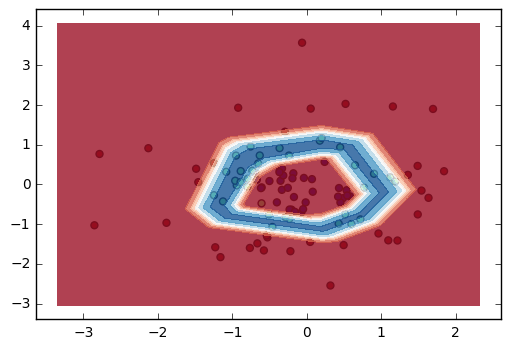

In [10]:
from matplotlib.colors import ListedColormap

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))

ax = plt.subplot()
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1] 
ax.scatter(X[:, 0], X[:, 1], marker='o', c=Y,
            s=25, edgecolor='k')

Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.show()